In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Matplotlib works")


Matplotlib works


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

print("Everything works")


Everything works


In [25]:
import pandas as pd

df = pd.read_csv("netflix_titles.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [26]:
df.shape
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [27]:
df.shape

(8807, 12)

In [28]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [29]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [30]:
df = df.drop(columns=["director", "cast", "description"])


In [31]:
df["country"] = df["country"].fillna("Unknown")
df["rating"] = df["rating"].fillna("Unknown")
df["date_added"] = df["date_added"].fillna("Unknown")
df["duration"] = df["duration"].fillna("0")


In [32]:
df.isnull().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [33]:
# Extract digits from 'duration' and convert to integer
df["duration_num"] = df["duration"].str.extract("(\d+)").astype(int)

# Check the new column
print(df[["duration", "duration_num"]].head())
print("\nNew Data Types:")
print(df.dtypes)

    duration  duration_num
0     90 min            90
1  2 Seasons             2
2   1 Season             1
3   1 Season             1
4  2 Seasons             2

New Data Types:
show_id         object
type            object
title           object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
duration_num     int64
dtype: object


In [34]:
# Select the columns we want to use for clustering
# We ignore title/country for now to keep it simple
features = df[['type', 'rating']].copy()

# Convert text to binary columns (0s and 1s)
features = pd.get_dummies(features, drop_first=True)

# Add the duration number back in
features['duration_num'] = df['duration_num']

# See what the data looks like now
print(features.head())

   type_TV Show  rating_74 min  rating_84 min  rating_G  rating_NC-17  \
0         False          False          False     False         False   
1          True          False          False     False         False   
2          True          False          False     False         False   
3          True          False          False     False         False   
4          True          False          False     False         False   

   rating_NR  rating_PG  rating_PG-13  rating_R  rating_TV-14  rating_TV-G  \
0      False      False          True     False         False        False   
1      False      False         False     False         False        False   
2      False      False         False     False         False        False   
3      False      False         False     False         False        False   
4      False      False         False     False         False        False   

   rating_TV-MA  rating_TV-PG  rating_TV-Y  rating_TV-Y7  rating_TV-Y7-FV  \
0         False

In [35]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the data (returns a math array, so we wrap it back in a DataFrame for readability)
scaled_features = scaler.fit_transform(features)

# Convert back to DataFrame just to see it
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

# Check the new values (they should be small decimals now, like -1.2 or 0.5)
print(scaled_df.head())

   type_TV Show  rating_74 min  rating_84 min  rating_G  rating_NC-17  \
0     -0.660659      -0.010656      -0.010656  -0.06839      -0.01846   
1      1.513640      -0.010656      -0.010656  -0.06839      -0.01846   
2      1.513640      -0.010656      -0.010656  -0.06839      -0.01846   
3      1.513640      -0.010656      -0.010656  -0.06839      -0.01846   
4      1.513640      -0.010656      -0.010656  -0.06839      -0.01846   

   rating_NR  rating_PG  rating_PG-13  rating_R  rating_TV-14  rating_TV-G  \
0  -0.095744  -0.183536      4.119887 -0.315872     -0.570051    -0.160063   
1  -0.095744  -0.183536     -0.242725 -0.315872     -0.570051    -0.160063   
2  -0.095744  -0.183536     -0.242725 -0.315872     -0.570051    -0.160063   
3  -0.095744  -0.183536     -0.242725 -0.315872     -0.570051    -0.160063   
4  -0.095744  -0.183536     -0.242725 -0.315872     -0.570051    -0.160063   

   rating_TV-MA  rating_TV-PG  rating_TV-Y  rating_TV-Y7  rating_TV-Y7-FV  \
0     -0.756755

In [36]:
from sklearn.cluster import KMeans

# 1. Initialize the AI (Let's ask for 10 groups)
kmeans = KMeans(n_clusters=10, random_state=42)

# 2. Feed it the scaled data
# It learns the patterns and assigns a label (0 to 9) to every row
df['cluster'] = kmeans.fit_predict(scaled_features)

# 3. Check the results
# See how many movies/shows ended up in each group
print(df['cluster'].value_counts())

cluster
8    2160
1    2119
0    1455
7     863
3     799
4     490
5     334
2     287
6     220
9      80
Name: count, dtype: int64


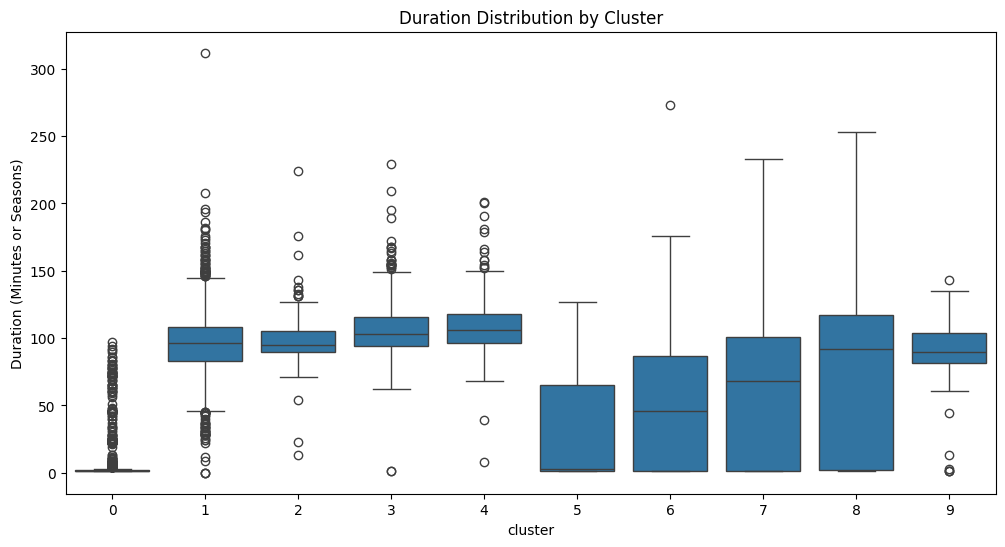

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot to see the duration range for each cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='cluster', y='duration_num', data=df)
plt.title('Duration Distribution by Cluster')
plt.ylabel('Duration (Minutes or Seasons)')
plt.show()

In [38]:
# Check what is inside Cluster 0 (The flat line)
print("Cluster 0 Examples:")
print(df[df['cluster'] == 0][['type', 'title', 'duration']].head())

print("\n-----------------\n")

# Check what is inside Cluster 1 (One of the floating boxes)
print("Cluster 1 Examples:")
print(df[df['cluster'] == 1][['type', 'title', 'duration']].head())

Cluster 0 Examples:
      type                  title   duration
1  TV Show          Blood & Water  2 Seasons
2  TV Show              Ganglands   1 Season
3  TV Show  Jailbirds New Orleans   1 Season
4  TV Show           Kota Factory  2 Seasons
5  TV Show          Midnight Mass   1 Season

-----------------

Cluster 1 Examples:
     type                                              title duration
7   Movie                                            Sankofa  125 min
12  Movie                                       Je Suis Karl  127 min
16  Movie  Europe's Most Dangerous Man: Otto Skorzeny in ...   67 min
35  Movie                     The Father Who Moves Mountains  110 min
36  Movie                                     The Stronghold  105 min


In [39]:
# Create a summary table to interpret the clusters
cluster_summary = df.groupby('cluster')[['type', 'duration_num']].agg(
    count=('type', 'count'),
    avg_duration=('duration_num', 'mean'),
    common_type=('type', lambda x: x.mode()[0])
).sort_values(by='avg_duration')

print(cluster_summary)

# Save the results to a new CSV file
df.to_csv("netflix_clustered.csv", index=False)
print("\nProject Complete. Data saved to 'netflix_clustered.csv'.")

         count  avg_duration common_type
cluster                                 
0         1455      5.885223     TV Show
5          334     28.766467     TV Show
6          220     46.418182       Movie
7          863     59.975666       Movie
8         2160     73.481481       Movie
9           80     88.862500       Movie
1         2119     95.617744       Movie
2          287     98.282230       Movie
3          799    106.455569       Movie
4          490    108.330612       Movie

Project Complete. Data saved to 'netflix_clustered.csv'.


In [40]:
# Investigate the weird "Cluster 5"
print("What is in Cluster 5 (Avg 29)?")
print(df[df['cluster'] == 5][['type', 'title', 'duration']].head(10))

What is in Cluster 5 (Avg 29)?
        type                                   title   duration
34   TV Show                 Tayo and Little Wizards   1 Season
37   TV Show                             Angry Birds   1 Season
39   TV Show                            Chhota Bheem  3 Seasons
40   TV Show  He-Man and the Masters of the Universe   1 Season
77     Movie           Little Singham - Black Shadow     48 min
80     Movie             Firedrake the Silver Dragon     93 min
85   TV Show     Pokémon Master Journeys: The Series   1 Season
89   TV Show                             Mighty Raju  4 Seasons
97   TV Show                              Kid Cosmic  2 Seasons
100  TV Show                 Tobot Galaxy Detectives  2 Seasons


In [41]:
# 1. Filter: Create a new dataframe with ONLY Movies
movies_df = df[df['type'] == 'Movie'].copy()

# 2. Select Features (Now we only need Duration and Rating)
# We don't need 'type' anymore because they are all movies!
movie_features = movies_df[['duration_num', 'rating']]

# 3. Encode Rating and Scale
movie_features = pd.get_dummies(movie_features, drop_first=True)
scaler = StandardScaler()
scaled_movies = scaler.fit_transform(movie_features)

# 4. Run K-Means on just Movies (Let's try 5 groups this time)
kmeans_movies = KMeans(n_clusters=5, random_state=42)
movies_df['cluster'] = kmeans_movies.fit_predict(scaled_movies)

# 5. Check the new Clean Summary
movie_summary = movies_df.groupby('cluster')['duration_num'].agg(['count', 'mean', 'min', 'max']).sort_values(by='mean')
print(movie_summary)

         count        mean  min  max
cluster                             
2         3542   93.649351    0  233
3           75   94.533333   44  143
1          287   98.282230   13  224
4          797  106.720201   62  229
0         1430  110.594406    5  312


In [42]:
# 1. Filter out movies with 0 duration
movies_clean = movies_df[movies_df['duration_num'] > 0].copy()

# 2. Re-do the clustering process on the clean data
features = pd.get_dummies(movies_clean[['duration_num', 'rating']], drop_first=True)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=5, random_state=42)
movies_clean['cluster'] = kmeans.fit_predict(scaled_features)

# 3. Final Summary
final_summary = movies_clean.groupby('cluster')['duration_num'].agg(['count', 'mean', 'min', 'max']).sort_values(by='mean')
print(final_summary)

# 4. Save the final clean version
movies_clean.to_csv("netflix_movies_clustered.csv", index=False)
print("\nFinal clean file saved.")

         count        mean  min  max
cluster                             
4         3122   91.402947    3  233
3          287   98.282230   13  224
2          797  106.720201   62  229
1          490  108.330612    8  201
0         1432  110.687151    5  312

Final clean file saved.


In [43]:
# 1. Filter: Create a dataframe with ONLY TV Shows
tv_df = df[df['type'] == 'TV Show'].copy()

# 2. Select Features (Duration and Rating)
# Note: Duration here means "Number of Seasons"
tv_features = pd.get_dummies(tv_df[['duration_num', 'rating']], drop_first=True)

# 3. Scale
scaler = StandardScaler()
scaled_tv = scaler.fit_transform(tv_features)

# 4. Run K-Means (Let's stick to 3 groups for TV: Short, Medium, Long)
kmeans_tv = KMeans(n_clusters=3, random_state=42)
tv_df['cluster'] = kmeans_tv.fit_predict(scaled_tv)

# 5. Summary
tv_summary = tv_df.groupby('cluster')['duration_num'].agg(['count', 'mean', 'min', 'max']).sort_values(by='mean')
print(tv_summary)

# 6. Save separate file
tv_df.to_csv("netflix_tv_clustered.csv", index=False)
print("\nTV Show analysis complete. Saved to 'netflix_tv_clustered.csv'.")

         count      mean  min  max
cluster                           
2          323  1.668731    1   11
0         1620  1.758642    1   13
1          733  1.821282    1   17

TV Show analysis complete. Saved to 'netflix_tv_clustered.csv'.


In [44]:
# 1. Filter for TV Shows
tv_df = df[df['type'] == 'TV Show'].copy()

# 2. Use ONLY duration for clustering (Force the AI to focus on length)
# We reshape it because the AI expects a 2D table, even for one column
tv_features = tv_df[['duration_num']]

# 3. Run K-Means (3 groups: Flops/Miniseries, Successes, Long-Running Hits)
kmeans_tv = KMeans(n_clusters=3, random_state=42)
tv_df['cluster'] = kmeans_tv.fit_predict(tv_features)

# 4. Check the summary
tv_summary = tv_df.groupby('cluster')['duration_num'].agg(['count', 'mean', 'min', 'max']).sort_values(by='mean')
print(tv_summary)

# 5. Save the fixed file
tv_df.to_csv("netflix_tv_clustered.csv", index=False)

         count      mean  min  max
cluster                           
0         2218  1.191614    1    2
2          359  3.626741    3    5
1           99  7.858586    6   17
